In [3]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

### Application of the algorithm is to recommend products based on the products already present in user’s cart

In [7]:
market_df= pd.read_excel(r"/Users/iqrabismi/Desktop/projects/Machine-Learning-Projects/ItemRecommendation/OnlineRetail.xlsx")

In [8]:
market_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
len(market_df)

541909

## Data Preprocessing

In [10]:
market_df.isna().sum() # checking the missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
len(market_df[market_df.duplicated(keep='first')==True])

5268

In [12]:
# dropping the duplicates

In [13]:
market_df[market_df.duplicated(keep='first')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [14]:
market_df.drop_duplicates(inplace=True)

In [15]:
len(market_df[market_df.duplicated(keep='first')==True])

0

In [16]:
### stripping the extra white space in Description 

In [17]:
market_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [18]:
market_df['Description'] = market_df['Description'].str.strip()

In [19]:
### Number of Unique contries

In [20]:
market_df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [21]:
### Proportion of items bought wrt countries

In [22]:
market_df.Country.value_counts(normalize=True, ascending=False)

United Kingdom          0.913646
Germany                 0.017665
France                  0.015916
EIRE                    0.015250
Spain                   0.004711
Netherlands             0.004418
Belgium                 0.003855
Switzerland             0.003716
Portugal                0.002814
Australia               0.002344
Norway                  0.002024
Italy                   0.001496
Channel Islands         0.001411
Finland                 0.001295
Cyprus                  0.001139
Sweden                  0.000859
Unspecified             0.000824
Austria                 0.000747
Denmark                 0.000725
Japan                   0.000667
Poland                  0.000635
Israel                  0.000548
USA                     0.000542
Hong Kong               0.000529
Singapore               0.000427
Iceland                 0.000339
Canada                  0.000281
Greece                  0.000272
Malta                   0.000237
United Arab Emirates    0.000127
European C

In [23]:
### checking the null value 

In [24]:
market_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [25]:
### dropping the null values

In [26]:
market_df.dropna(inplace=True, axis= 0)

In [27]:
market_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [35]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  datetime64[ns]
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   Total_amount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [36]:
market_df.describe()

,Quantity,UnitPrice,CustomerID,Total_amount
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


## Item Recommendation

### We will recommend products for top 4 countries

### For UK

In [26]:
market_UK = market_df[market_df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


In [27]:
market_UK

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### For Australia

In [28]:
market_Australia = market_df[market_df['Country'] =="Australia"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


In [29]:
market_Australia

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 HOOK HANGER MAGIC GARDEN,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP WEDDING DAY,YELLOW GIANT GARDEN THERMOMETER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537676,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C560540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
C561227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C568694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### For Spain

In [30]:
market_Spain = market_df[market_df['Country'] =="Spain"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


In [31]:
market_Spain

Description,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
538525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C569422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C571499,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C574894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### For France

In [32]:
market_France = market_df[market_df['Country'] =="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [33]:
market_France

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C579562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C580161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def encode(x):
    if x>=1:
        return 1 
    else:
        return 0 

In [35]:
### Using Apply-Map function to encode the data

In [36]:
market_France= market_France.applymap(encode)

In [37]:
market_UK= market_UK.applymap(encode)

In [38]:
market_Spain= market_Spain.applymap(encode)

In [39]:
market_Australia= market_Australia.applymap(encode)

## Modelling

### For UK

In [40]:
freqitems1 = apriori(market_UK, min_support = 0.01, use_colnames = True)
  
freqitems1.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.010072,(10 COLOUR SPACEBOY PEN)
1,0.012540,(12 PENCIL SMALL TUBE WOODLAND)
2,0.014353,(12 PENCILS SMALL TUBE RED RETROSPOT)
3,0.013748,(12 PENCILS SMALL TUBE SKULL)
4,0.010425,(12 PENCILS TALL TUBE RED RETROSPOT)


In [41]:
rules1 = association_rules(freqitems1, metric ="lift", min_threshold = 1)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
541,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.011331,0.030820,0.010173,0.897778,29.129368,0.009824,9.481105
384,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.019288,0.030820,0.017173,0.890339,28.888023,0.016578,8.837995
540,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.011583,0.034144,0.010173,0.878261,25.722162,0.009777,7.933816
378,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.013345,0.030820,0.011583,0.867925,28.160747,0.011172,7.338074
533,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(ROSES REGENCY TEACUP AND SAUCER),0.013345,0.034144,0.011331,0.849057,24.866839,0.010875,6.398795


In [42]:
## In UK, we can see that different types of cups are bought together. 

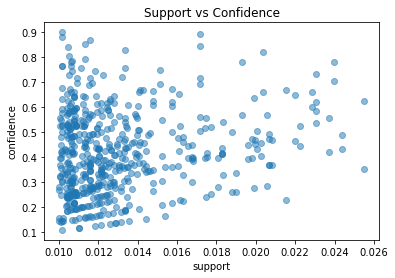

In [43]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

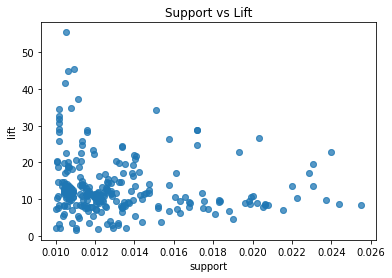

In [44]:
plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

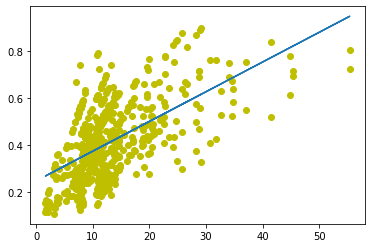

In [45]:
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'],fit_fn(rules1['lift']))

### Spain

In [46]:
freqitems2 = apriori(market_Spain, min_support = 0.05, use_colnames = True)
  
freqitems2.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.057143,(4 TRADITIONAL SPINNING TOPS)
1,0.142857,(6 RIBBONS RUSTIC CHARM)
2,0.066667,(ALARM CLOCK BAKELIKE GREEN)
3,0.057143,(ALARM CLOCK BAKELIKE PINK)
4,0.057143,(ALARM CLOCK BAKELIKE RED)


In [47]:
rules2 = association_rules(freqitems2, metric ="lift", min_threshold = 1)
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.066667,0.076190,0.066667,1.0,13.125000,0.061587,inf
104,"(POPPY'S PLAYHOUSE KITCHEN, POSTAGE)",(POPPY'S PLAYHOUSE BEDROOM),0.057143,0.076190,0.057143,1.0,13.125000,0.052789,inf
30,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.057143,0.104762,0.057143,1.0,9.545455,0.051156,inf
115,"(PACK OF 72 RETROSPOT CAKE CASES, 6 RIBBONS RU...","(ASSORTED COLOUR BIRD ORNAMENT, POSTAGE)",0.057143,0.104762,0.057143,1.0,9.545455,0.051156,inf
74,"(PACK OF 72 RETROSPOT CAKE CASES, 6 RIBBONS RU...",(ASSORTED COLOUR BIRD ORNAMENT),0.057143,0.114286,0.057143,1.0,8.750000,0.050612,inf


In [48]:
## For Spain, confidence is one which shows that playhouse kitchen and bedroom set are bought together

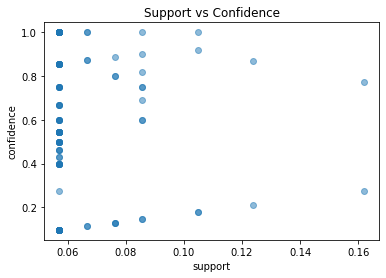

In [49]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

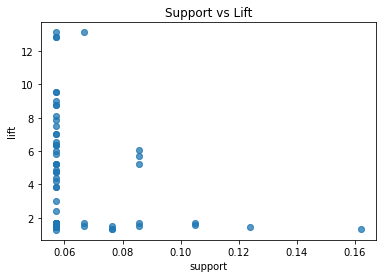

In [50]:
plt.scatter(rules2['support'], rules2['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

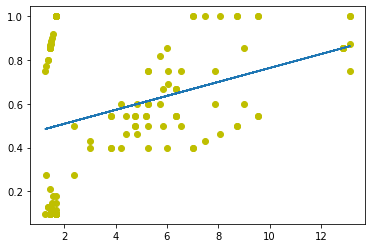

In [51]:
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'],fit_fn(rules2['lift']))

### France

In [52]:
freqitems3 = apriori(market_France, min_support = 0.05, use_colnames = True)
  
freqitems3.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.061135,(4 TRADITIONAL SPINNING TOPS)
1,0.082969,(ALARM CLOCK BAKELIKE GREEN)
2,0.087336,(ALARM CLOCK BAKELIKE PINK)
3,0.080786,(ALARM CLOCK BAKELIKE RED)
4,0.058952,(ASSORTED COLOUR MINI CASES)


In [53]:
rules3 = association_rules(freqitems3, metric ="lift", min_threshold = 1)
rules3 = rules3.sort_values(['confidence', 'lift'], ascending =[False, False])
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.065502,0.655022,0.065502,1.000000,1.526667,0.022597,inf
209,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.087336,0.109170,0.085153,0.975000,8.931000,0.075618,35.633188
208,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.087336,0.117904,0.085153,0.975000,8.269444,0.074856,35.283843
216,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.072052,0.109170,0.069869,0.969697,8.882424,0.062003,29.397380
215,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.072052,0.117904,0.069869,0.969697,8.224467,0.061374,29.109170


In [54]:
## In France, we can observe that paper cups and paper napkins are bought together

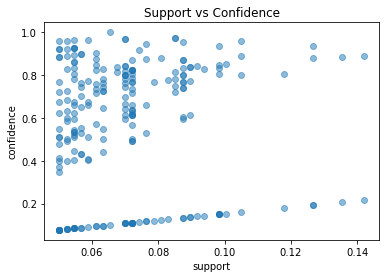

In [55]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

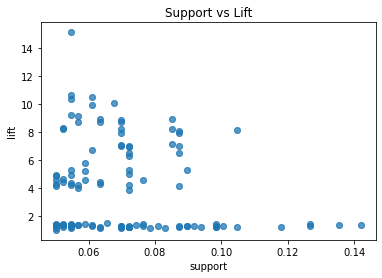

In [56]:
plt.scatter(rules3['support'], rules3['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

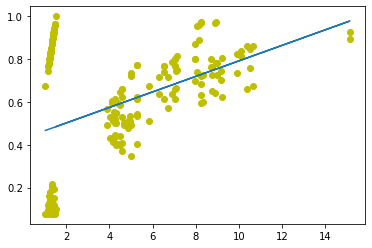

In [57]:
fit = np.polyfit(rules3['lift'], rules3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'],fit_fn(rules3['lift']))

### Australia

In [58]:
freqitems4 = apriori(market_Australia, min_support = 0.05, use_colnames = True)
  
freqitems4.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.057971,(36 PENCILS TUBE RED RETROSPOT)
1,0.072464,(4 TRADITIONAL SPINNING TOPS)
2,0.086957,(ALARM CLOCK BAKELIKE GREEN)
3,0.057971,(ALARM CLOCK BAKELIKE IVORY)
4,0.086957,(ALARM CLOCK BAKELIKE RED)


In [59]:
rules4 = association_rules(freqitems4, metric ="lift", min_threshold = 1)
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.057971,0.057971,0.057971,1.0,17.25,0.05461,inf
1,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.057971,0.057971,0.057971,1.0,17.25,0.05461,inf
52,(FELTCRAFT DOLL MOLLY),(SET OF 4 PANTRY JELLY MOULDS),0.057971,0.057971,0.057971,1.0,17.25,0.05461,inf
53,(SET OF 4 PANTRY JELLY MOULDS),(FELTCRAFT DOLL MOLLY),0.057971,0.057971,0.057971,1.0,17.25,0.05461,inf
106,(SET OF 12 MINI LOAF BAKING CASES),(SET OF 12 FAIRY CAKE BAKING CASES),0.057971,0.057971,0.057971,1.0,17.25,0.05461,inf


In [60]:
## In Germany, we can see that combination of girls and boys cutlery and toys

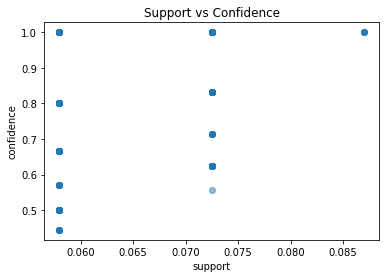

In [61]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

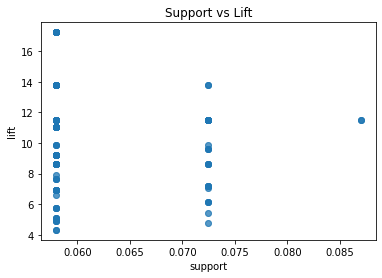

In [62]:
plt.scatter(rules4['support'], rules4['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

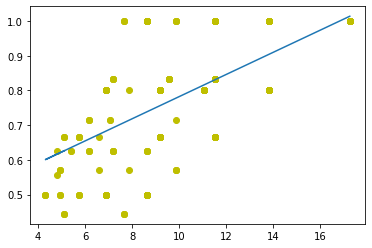

In [63]:
fit = np.polyfit(rules4['lift'], rules4['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules4['lift'], rules4['confidence'], 'yo', rules4['lift'],fit_fn(rules4['lift']))

## RFM Analysis

In [ ]:
market_df= pd.read_excel(r"/Users/iqrabismi/Desktop/projects/Machine-Learning-Projects/ItemRecommendation/OnlineRetail.xlsx")

In [94]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [33]:
market_df['Total_amount'] = market_df['UnitPrice']*market_df['Quantity']

In [34]:
market_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [41]:
frequency= market_df.groupby('CustomerID')['InvoiceNo'].count()

In [45]:
frequency= frequency.reset_index()

In [49]:
frequency.rename(columns= {'InvoiceNo': 'Frequency'}, inplace=True)

#### Frequency

In [51]:
frequency.sort_values('Frequency', ascending=False).head(10)

,CustomerID,Frequency
4042,17841.0,7812
1895,14911.0,5898
1300,14096.0,5128
330,12748.0,4459
1674,14606.0,2759
2192,15311.0,2478
1703,14646.0,2085
568,13089.0,1853
698,13263.0,1667
1447,14298.0,1640


### Recency

In [53]:
market_df['diff'] = max(market_df['InvoiceDate'])- market_df['InvoiceDate']

In [63]:
recency= market_df.groupby('CustomerID')['diff'].min()

In [64]:
recency= recency.reset_index()

In [65]:
recency['diff']= recency['diff'].dt.days


In [80]:
recency.rename(columns={'diff':'Recency'}, inplace=True)

In [81]:
recency.head(10)

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


### Monetary

In [82]:
monetary= market_df.groupby('CustomerID')['Total_amount'].sum()

In [83]:
monetary= monetary.reset_index()

In [84]:
monetary.rename(columns={'Total_amount':'Monetary'}, inplace=True)

In [85]:
monetary.head(10)

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


### Merging all three df for RMF Analysis

In [86]:
rfm= recency.merge(frequency, on='CustomerID', how='inner')

In [87]:
rfm= rfm.merge(monetary, on='CustomerID', how='inner')

In [88]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53


### Checking the distributiong for R,F and M

<AxesSubplot:>

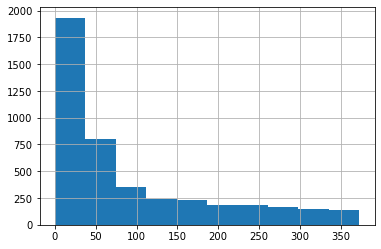

In [90]:
rfm['Recency'].hist()

<AxesSubplot:>

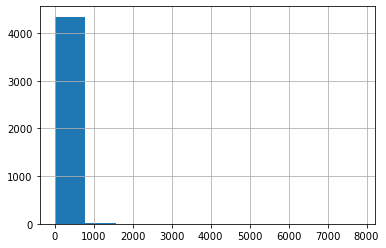

In [92]:
rfm['Frequency'].hist(bins=10)

<AxesSubplot:>

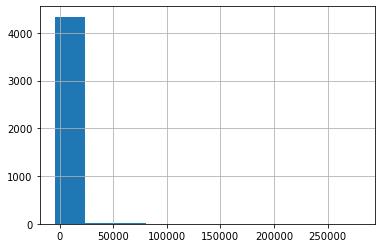

In [93]:
rfm['Monetary'].hist(bins=10)

### Scaling the data for Cluster Analysis

In [95]:
scaler= MinMaxScaler()

In [100]:
rfm_scaled= rfm[['Recency','Frequency','Monetary']]

In [101]:
rfm_scaled= scaler.fit_transform(rfm_scaled)

In [102]:
rfm_scaled= pd.DataFrame(rfm_scaled, columns=['Recency','Frequency','Monetary'])
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.871314,0.000128,0.015109
1,0.002681,0.023172,0.030297
2,0.198391,0.003841,0.021442
3,0.048257,0.009218,0.021303
4,0.828418,0.002048,0.016288


<AxesSubplot:>

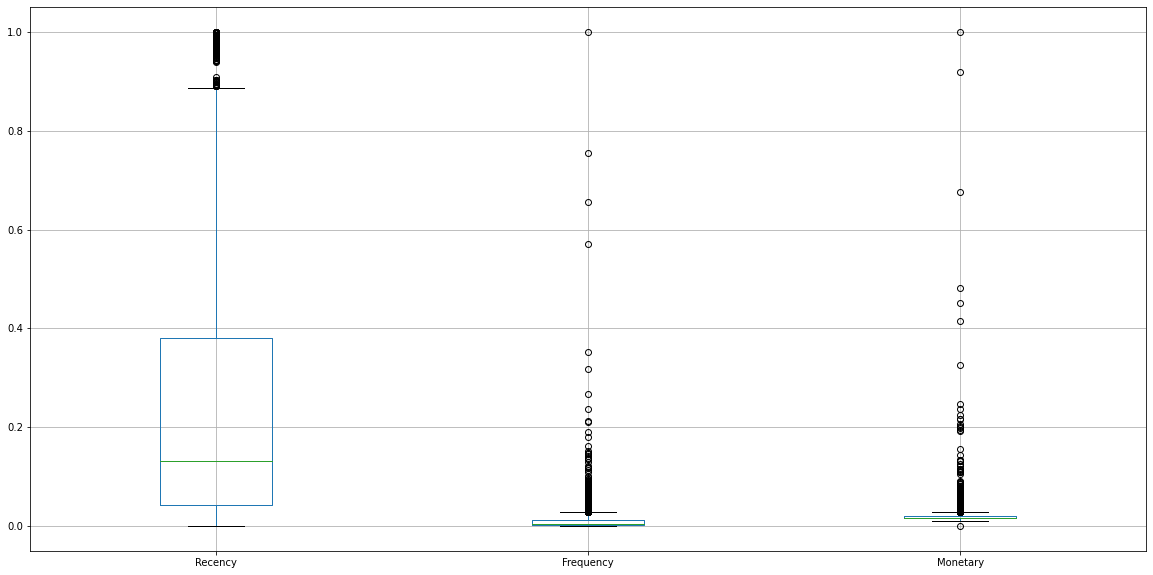

In [109]:
plt.figure(figsize=(20,10))
rfm_scaled.boxplot()

### Clustering

In [111]:
from sklearn.cluster import KMeans

In [113]:
kmeans= KMeans(n_clusters= 4, max_iter= 70)

In [114]:
kmeans.fit(rfm_scaled)

KMeans(max_iter=70, n_clusters=4)

In [115]:
variance= []
val= [2,3,4,5,6,7]
for i in val:
    kmeans= KMeans(n_clusters= i, max_iter= 70)
    kmeans.fit(rfm_scaled)
    variance.append(kmeans.inertia_)

In [116]:
variance

[72.84591826827025,
 38.23961068178938,
 24.766043487726588,
 18.01768005665319,
 14.606689807076277,
 11.322001265410265]

### Silhouette Analysis

In [118]:
for i in val:
    kmeans= KMeans(n_clusters= i, max_iter= 70)
    kmeans.fit(rfm_scaled)
    label= kmeans.labels_
    silhouette_avg= silhouette_score(rfm_scaled, label)
    print('when cluster is {0} then silhouette score is {1}'.format(i,silhouette_avg))

when cluster is 2 then silhouette score is 0.7276928370366591
when cluster is 3 then silhouette score is 0.6569108485288879
when cluster is 4 then silhouette score is 0.5793689980241765
when cluster is 5 then silhouette score is 0.5679051588075347
when cluster is 6 then silhouette score is 0.5539038476766718
when cluster is 7 then silhouette score is 0.5667497470488562


In [119]:
## Based on above score we are selecting model with cluster= 3

In [120]:
kmeans= KMeans(n_clusters= 3, max_iter= 70)
kmeans.fit(rfm_scaled)

KMeans(max_iter=70, n_clusters=3)

In [121]:
rfm_scaled['CustomerID'] = rfm['CustomerID']

In [122]:
rfm_scaled.head()

,Recency,Frequency,Monetary,CustomerID
0,0.871314,0.000128,0.015109,12346.0
1,0.002681,0.023172,0.030297,12347.0
2,0.198391,0.003841,0.021442,12348.0
3,0.048257,0.009218,0.021303,12349.0
4,0.828418,0.002048,0.016288,12350.0


In [123]:
rfm_scaled['label']= kmeans.labels_

In [124]:
rfm_scaled.head()

,Recency,Frequency,Monetary,CustomerID,label
0,0.871314,0.000128,0.015109,12346.0,1
1,0.002681,0.023172,0.030297,12347.0,2
2,0.198391,0.003841,0.021442,12348.0,2
3,0.048257,0.009218,0.021303,12349.0,2
4,0.828418,0.002048,0.016288,12350.0,1


<AxesSubplot:xlabel='label', ylabel='count'>

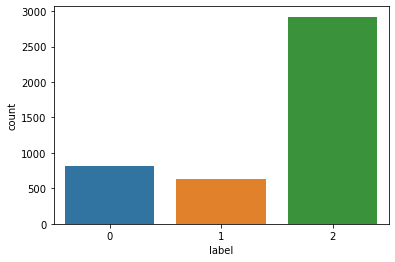

In [127]:
sns.countplot(data= rfm_scaled, x='label')

<AxesSubplot:xlabel='label', ylabel='Monetary'>

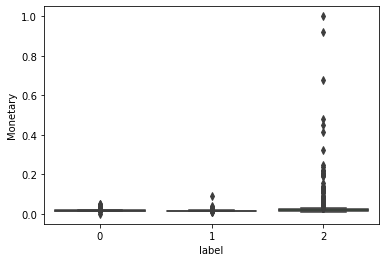

In [128]:
sns.boxplot(data= rfm_scaled, x='label', y='Monetary') # which cluster spent more

<AxesSubplot:xlabel='label', ylabel='Recency'>

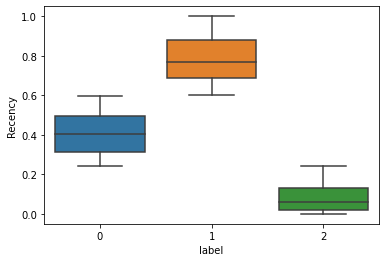

In [129]:
sns.boxplot(data= rfm_scaled, x='label', y='Recency') # which cluster is more recent

<AxesSubplot:xlabel='label', ylabel='Frequency'>

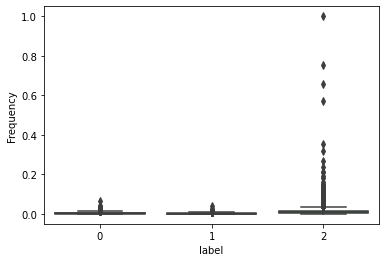

In [130]:
sns.boxplot(data= rfm_scaled, x='label', y='Frequency') # which cluster is more frequent

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

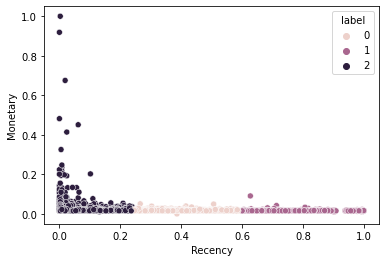

In [133]:
sns.scatterplot(data= rfm_scaled, x='Recency', y='Monetary', hue='label') 
# dark purple group purchased spent more and has bought products recently

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

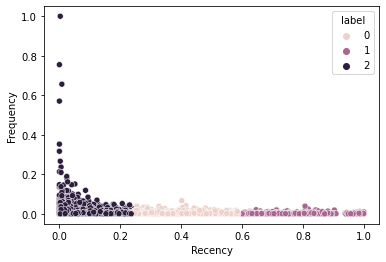

In [134]:
sns.scatterplot(data= rfm_scaled, x='Recency', y='Frequency', hue='label')
# dark purple group purchased products frequently and has bought products recently

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

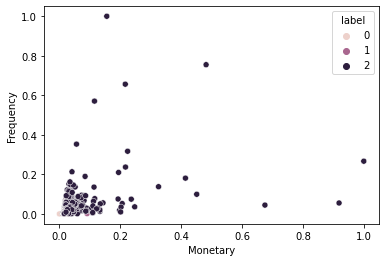

In [135]:
sns.scatterplot(data= rfm_scaled, x='Monetary', y='Frequency', hue='label')
# dark purple group purchased products frequently and has spent more